# Multi-Input Model Classification in Keras (LSTM Neural Network)

In [6]:
import os
os.getcwd()


'C:\\Users\\ghamy\\OneDrive - University of South Australia\\MS Data Science\\Semester 4\\Capstone Professional Project\\Me (Noman)\\keras-multi-input'

In [7]:
path = r"C:\Users\ghamy\OneDrive - University of South Australia\MS Data Science\Semester 4\Capstone Professional Project\Me (Noman)\keras-multi-input"
os.chdir(path)

In [8]:
os.getcwd()

'C:\\Users\\ghamy\\OneDrive - University of South Australia\\MS Data Science\\Semester 4\\Capstone Professional Project\\Me (Noman)\\keras-multi-input'

In [9]:
# Loading Python libraries
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to read pickle files
import pickle

In [10]:
# Loading Data (4 files as dataframes)

# function for laoding pickle files
def loadObject(name):
    try:
        with open(name, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print('Could not find file "{}"". Please check it exists inc. the file extension'.format(str(name)))

# using function to load pickle files
myObject = loadObject('chatEmbeddings_2019-08-14-165706.pkl')
myObject1 = loadObject('transactionEmbeddings_2019-08-14-165704.pkl')

# Reading metadata and clickstream csv files 

data_df = pd.read_csv('Capstone_Final_Data.csv')


# converting files to data frames for EDA and further analysis
chat_df = pd.DataFrame(myObject)
transaction_df = pd.DataFrame(myObject1)




In [11]:
len(chat_df)

24104

In [12]:
len(transaction_df)

607087

In [13]:
chat_df.loc[chat_df['status'] == 'withdrawn','status'] = 'declined'
transaction_df.loc[transaction_df['status'] == 'withdrawn','status'] = 'declined'

# Creating a Model with Chat Embeddings Only

In [14]:
chat_df.head()

,applicationid,chatEmbedding,chatid,chatstarton,rating,sentiment_compound,status,user_type,utteranceid
0,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,8bd6b80d2aa9d4bab974b34ba0319c8cd73ec2441fb25d...
1,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,851ec87283eaffc8375c0bf42c7b38d95707a27ebdaf05...
2,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[-0.015632771, 0.0395712, -0.021834029, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.2263,declined,visitor,0514e95a2ca7e0c14eb862d4a3ef7810eda207dedeb60c...
3,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.04322845, 0.023193743, -0.014702667, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.0000,declined,visitor,f8e218879ec6a557ccc8905a5617ac191facfd0945aafe...
4,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.013008025, 0.0027834661, 0.04260392, -0.01...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.4019,declined,visitor,4b55bbd6c7cf7a68b2048e75dd304a361d5092743a5145...


In [15]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


In [16]:
X = chat_df[['chatEmbedding']].copy()
y = chat_df[['status']].copy()

In [17]:
X.shape

(24104, 1)

In [18]:
embedding_matrix = chat_df.chatEmbedding[0]
from itertools import repeat
for i in range(24103):
    embedding_matrix = np.vstack((embedding_matrix, chat_df.chatEmbedding[i]))


In [19]:
X = embedding_matrix

In [20]:
X.shape

(385664, 9)

In [21]:
y = y.loc[y.index.repeat(16)].reset_index(drop=True)

In [22]:
y.head()

,status
0,declined
1,declined
2,declined
3,declined
4,declined


In [23]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X1_train.shape

(308531, 9)

In [26]:
X1_train[1]

array([ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
       -0.01836227, -0.00864174,  0.02887807,  0.03490983], dtype=float32)

In [27]:
X1_test.shape

(77133, 9)

In [28]:
y1_train.shape

(308531,)

In [29]:
y1_test.shape

(77133,)

In [30]:
X1_test

array([[ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [-0.01285403, -0.03059145,  0.04359328, ...,  0.0282667 ,
         0.03512987, -0.00883285],
       ...,
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983]], dtype=float32)

In [31]:
from keras.utils import to_categorical
y1_train = to_categorical(y1_train)
y1_test = to_categorical(y1_test)

In [32]:
maxlen = 9
vocab_size = 16*24104

In [33]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 9, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(2, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 9, 9)              3470976   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 3,541,890
Trainable params: 70,914
Non-trainable params: 3,470,976
_________________________________________________________________
None


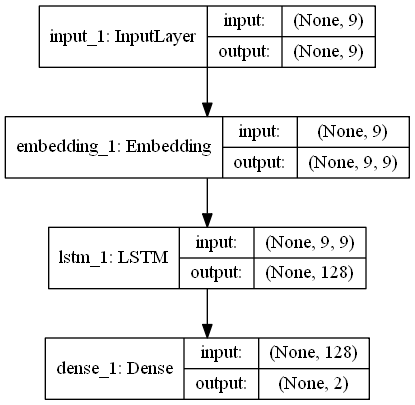

In [35]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [36]:
history = model.fit(X1_train, y1_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 246824 samples, validate on 61707 samples
Epoch 1/10
246824/246824 [==============================] - 31s 124us/step - loss: 0.6902 - acc: 0.5394 - val_loss: 0.6903 - val_acc: 0.5381
Epoch 2/10
246824/246824 [==============================] - 32s 130us/step - loss: 0.6901 - acc: 0.5394 - val_loss: 0.6903 - val_acc: 0.5381
Epoch 3/10
246824/246824 [==============================] - 30s 121us/step - loss: 0.6901 - acc: 0.5394 - val_loss: 0.6903 - val_acc: 0.5381
Epoch 4/10
246824/246824 [==============================] - 32s 128us/step - loss: 0.6901 - acc: 0.5394 - val_loss: 0.6902 - val_acc: 0.5381
Epoch 5/10
246824/246824 [==============================] - 33s 133us/step - loss: 0.6901 - acc: 0.5394 - val_loss: 0.6903 - val_acc: 0.5381
Epoch 6/10
246824/246824 [==============================] - 33s 135us/step - loss: 0.6901 - acc: 0.5394 - val_loss: 0.6902 - val_acc: 0.5381
Epoch 7/10
246824/246824 [==============================] - 30s 123us/step - loss: 0.6901 - acc: 0.5394

In [37]:
score = model.evaluate(X1_test, y1_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

77133/77133 [==============================] - 6s 82us/step
Test Score: 0.6896745220773126
Test Accuracy: 0.541674792766571


In [41]:
single_x_test = X1_test[0:9]

In [42]:
single_x_test

array([[ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [-0.01285403, -0.03059145,  0.04359328,  0.03636283, -0.04215313,
         0.03540075,  0.0282667 ,  0.03512987, -0.00883285],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0.03291637,
        -0.01836227, -0.00864174,  0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209,  0.04182083, -0

In [43]:
model.predict(single_x_test)

array([[0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335],
       [0.45675665, 0.54324335]], dtype=float32)

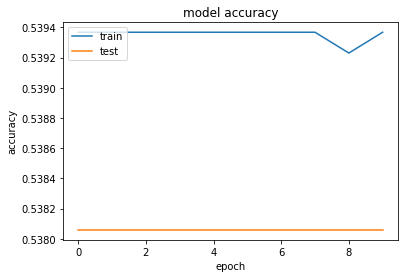

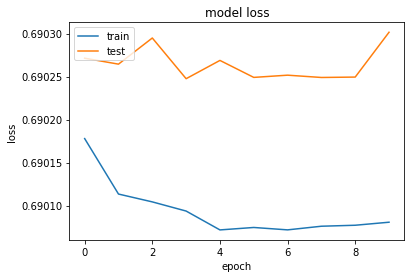

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a Model with Transaction Embeddings Only

In [45]:
transaction_df.head()

,accountid,applicationid,financialinstitution,status,transactionEmbedding,transactionamount,transactioncategory,transactionposteddate,txnid
0,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",180.00,IncomeSalaryRegularIncome,2018-06-18,ea8b12252c4b3e6c85b5fb29cb4d02d1252cf54df38fcd...
1,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",174.00,IncomeSalaryRegularIncome,2018-06-04,68aad105bc429721b1cd8c7dc70acbaaca06d99e66486f...
2,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.0037002675, -0.032413684, 0.02330419, 0.00...",-1695.68,TransferTransfers,2018-06-01,b4ff9d37964cd9f73a0ca4ff9c702cd261f3d6e2b2d052...
3,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.044274665, -0.030233014, -0.030928208, -0...",10264.00,IncomeOtherIncome,2018-05-22,dccdd51da721e751df8ce0ad77971ba97fbe6a39f762d8...
4,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.023104716, -0.030675078, -0.017270565, 0....",-41.43,TransferSecuritiesTrades,2018-05-21,f29a19b4120787ce8cc90be800f0f6d62cc9180c31c293...


In [46]:
transaction_df1 = transaction_df.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5).reset_index(drop=True)

In [47]:
len(transaction_df1)

37943

In [48]:
transaction_df1.transactionEmbedding[0].shape

(16, 16)

In [49]:
X1 = transaction_df1[['transactionEmbedding']].copy()
y1 = transaction_df1[['status']].copy()

In [50]:
X1.shape

(37943, 1)

In [51]:
len(X1)

37943

In [52]:
embedding_matrix1 = transaction_df.transactionEmbedding[0]
from itertools import repeat
for i in range(37942):
    embedding_matrix1 = np.vstack((embedding_matrix1, transaction_df.transactionEmbedding[i]))


In [53]:
X1 = embedding_matrix1

In [54]:
X1.shape

(607088, 16)

In [55]:
len(y1)

37943

In [56]:
y1 = y1.loc[y1.index.repeat(16)].reset_index(drop=True)

In [57]:
len(y1)

607088

In [58]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y1 = label_encoder.fit_transform(y1)

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [60]:
X_train1.shape

(485670, 16)

In [61]:
X_test1.shape

(121418, 16)

In [62]:
y_train1.shape

(485670,)

In [63]:
y_test1.shape

(121418,)

In [64]:
from keras.utils import to_categorical
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

In [65]:
maxlen1 = 16
vocab_size1 = 16*37943

In [66]:
deep_inputs1 = Input(shape=(maxlen1,))
embedding_layer1 = Embedding(vocab_size1, 16, weights=[embedding_matrix1], trainable=False)(deep_inputs1)
LSTM1_Layer_1 = LSTM(128)(embedding_layer1)
dense1_layer_1 = Dense(2, activation='softmax')(LSTM1_Layer_1)
model1 = Model(inputs=deep_inputs1, outputs=dense1_layer_1)

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [67]:
print(model1.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 16, 16)            9713408   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 9,787,906
Trainable params: 74,498
Non-trainable params: 9,713,408
_________________________________________________________________
None


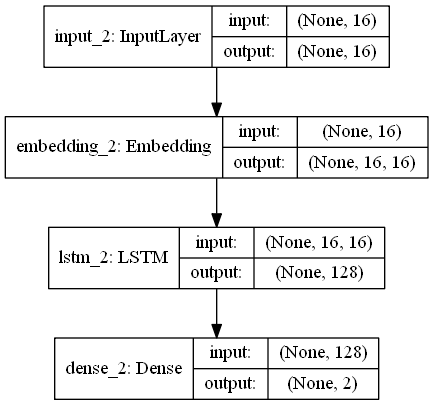

In [68]:

from keras.utils import plot_model
plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [69]:
history1 = model1.fit(X_train1, y_train1, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 388536 samples, validate on 97134 samples
Epoch 1/10
388536/388536 [==============================] - 97s 249us/step - loss: 0.5687 - acc: 0.7448 - val_loss: 0.5690 - val_acc: 0.7454
Epoch 2/10
388536/388536 [==============================] - 97s 249us/step - loss: 0.5681 - acc: 0.7449 - val_loss: 0.5676 - val_acc: 0.7454
Epoch 3/10
388536/388536 [==============================] - 91s 235us/step - loss: 0.5680 - acc: 0.7449 - val_loss: 0.5673 - val_acc: 0.7454
Epoch 4/10
388536/388536 [==============================] - 91s 235us/step - loss: 0.5680 - acc: 0.7449 - val_loss: 0.5673 - val_acc: 0.7454
Epoch 5/10
388536/388536 [==============================] - 89s 229us/step - loss: 0.5680 - acc: 0.7449 - val_loss: 0.5674 - val_acc: 0.7454
Epoch 6/10
388536/388536 [==============================] - 91s 235us/step - loss: 0.5680 - acc: 0.7449 - val_loss: 0.5676 - val_acc: 0.7454
Epoch 7/10
388536/388536 [==============================] - 90s 232us/step - loss: 0.5680 - acc: 0.7449

In [70]:
score1 = model1.evaluate(X_test1, y_test1, verbose=1)

print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])

121418/121418 [==============================] - 16s 131us/step
Test Score: 0.5689661954254294
Test Accuracy: 0.74391770362854


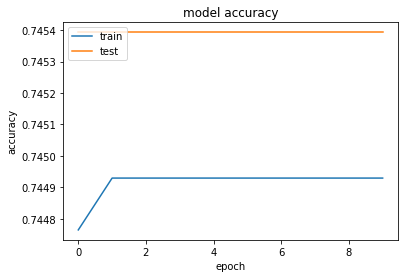

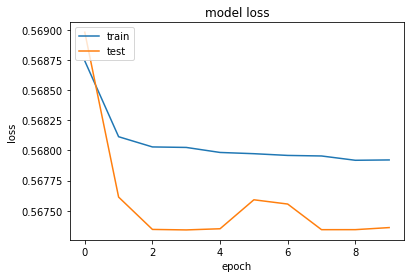

In [71]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a Model with Numerical and Categorical Features Only

In [72]:
data_df.head()

,applicationid,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,loantovalueratio,applicationtype,...,finalpage,pagesvisited,howentered,conversionpathlen,financialinstitutionmode,transactioncategorymode,transactionamountmedian,chatratedpercentage,chatsentimentmean,chatlength
0,000429e2882bd4555885bacf9678c0a60e10610ab9b7f8...,declined,QLD,PUR,Principal & Interest,livein,variable,12.917403,0.657669,SINGLE,...,home | worlds first instant home loan,1.0,PaidSearch,1.0,ING,TransferCreditCardPayments,-13.27,0.000000,0.000000,0.0
1,003dec44f66a6d3f85bdc0080ec7a49bb7f4e02bf3c81e...,declined,WA,REF,Principal & Interest,livein,variable,13.575731,0.619600,JOINT,...,own your home loan | tic:toc,1.0,Native,1.0,None,None,0.00,0.000000,0.000000,0.0
2,00696bdea8b77f36209e48a29ea490b32acd26c33c0dbd...,declined,QLD,REF,Principal & Interest,investment,variable,12.681971,0.794400,JOINT,...,am i eligible for a tic:toc loan?,2.0,PaidSearch,4.0,Westpac,ExpensesAtmCashWithdraws,-51.00,0.000000,0.000000,0.0
3,00776b64bf03fe8de18742eb413ccd1ad5a57264febcaa...,declined,NSW,REF,Principal & Interest,livein,fixed,12.980556,0.494100,SINGLE,...,our home loans | tic:toc,1.0,Affiliates,1.0,Commonwealth Bank CBA,TransferTransfers,-5.00,0.000000,0.000000,0.0
4,0077be1ca38bcfa8b4d2cc8fc9ff2efdce1c106b4a8ef6...,converted,VIC,REF,Principal & Interest,livein,variable,12.282987,0.160800,JOINT,...,rates fees,6.0,PaidSearch,8.0,ANZ,ExpensesGroceries,-35.96,0.727273,0.349618,11.0


In [73]:
del data_df['applicationid']

In [74]:
data_df.head()

,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,loantovalueratio,applicationtype,agecreatedon,...,finalpage,pagesvisited,howentered,conversionpathlen,financialinstitutionmode,transactioncategorymode,transactionamountmedian,chatratedpercentage,chatsentimentmean,chatlength
0,declined,QLD,PUR,Principal & Interest,livein,variable,12.917403,0.657669,SINGLE,32.0,...,home | worlds first instant home loan,1.0,PaidSearch,1.0,ING,TransferCreditCardPayments,-13.27,0.000000,0.000000,0.0
1,declined,WA,REF,Principal & Interest,livein,variable,13.575731,0.619600,JOINT,72.0,...,own your home loan | tic:toc,1.0,Native,1.0,None,None,0.00,0.000000,0.000000,0.0
2,declined,QLD,REF,Principal & Interest,investment,variable,12.681971,0.794400,JOINT,42.0,...,am i eligible for a tic:toc loan?,2.0,PaidSearch,4.0,Westpac,ExpensesAtmCashWithdraws,-51.00,0.000000,0.000000,0.0
3,declined,NSW,REF,Principal & Interest,livein,fixed,12.980556,0.494100,SINGLE,30.0,...,our home loans | tic:toc,1.0,Affiliates,1.0,Commonwealth Bank CBA,TransferTransfers,-5.00,0.000000,0.000000,0.0
4,converted,VIC,REF,Principal & Interest,livein,variable,12.282987,0.160800,JOINT,65.0,...,rates fees,6.0,PaidSearch,8.0,ANZ,ExpensesGroceries,-35.96,0.727273,0.349618,11.0


In [75]:
list(data_df)

['status',
 'propertystate',
 'loanpurpose',
 'repaymenttype',
 'loanusage',
 'ratetype',
 'loanamount',
 'loantovalueratio',
 'applicationtype',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'landingpage',
 'finalpage',
 'pagesvisited',
 'howentered',
 'conversionpathlen',
 'financialinstitutionmode',
 'transactioncategorymode',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']

In [76]:
X_meta = data_df[['propertystate',
 'loanpurpose',
 'repaymenttype',
 'loanusage',
 'ratetype',
 'loanamount',
 'loantovalueratio',
 'applicationtype',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'landingpage',
 'finalpage',
 'pagesvisited',
 'howentered',
 'conversionpathlen',
 'financialinstitutionmode',
 'transactioncategorymode',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']]
Y_meta = data_df['status']

In [77]:
categorical_columns = X_meta.select_dtypes(include=['object'])

In [78]:
numerical_columns = X_meta.select_dtypes(exclude = ['object'])

In [79]:
list(numerical_columns)

['loanamount',
 'loantovalueratio',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'pagesvisited',
 'conversionpathlen',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']

In [80]:
one_hot = pd.get_dummies(categorical_columns)
# Join the encoded df
X_meta = numerical_columns.join(one_hot)
X_meta.head()


,loanamount,loantovalueratio,agecreatedon,hasduplicate,loanpercentdifference,datedifference,sessioncount,visitdays,daysjourney,pagesvisited,...,transactioncategorymode_IncomeInterestIncome,transactioncategorymode_IncomeInvestmentRetirementIncome,transactioncategorymode_IncomeOtherIncome,transactioncategorymode_IncomeRefundsAdjustments,transactioncategorymode_IncomeSalaryRegularIncome,transactioncategorymode_IncomeSalesServiceIncome,transactioncategorymode_None,transactioncategorymode_TransferCreditCardPayments,transactioncategorymode_TransferSavings,transactioncategorymode_TransferTransfers
0,12.917403,0.657669,32.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,13.575731,0.619600,72.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,12.681971,0.794400,42.0,False,0.0,0.0,4.0,3.0,7.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,12.980556,0.494100,30.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,12.282987,0.160800,65.0,False,0.0,0.0,8.0,4.0,15.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
list(X_meta)

['loanamount',
 'loantovalueratio',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'pagesvisited',
 'conversionpathlen',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength',
 'propertystate_ACT',
 'propertystate_NSW',
 'propertystate_NT',
 'propertystate_QLD',
 'propertystate_SA',
 'propertystate_TAS',
 'propertystate_VIC',
 'propertystate_WA',
 'loanpurpose_PUR',
 'loanpurpose_REF',
 'repaymenttype_Interest Only',
 'repaymenttype_Principal & Interest',
 'loanusage_investment',
 'loanusage_livein',
 'ratetype_fixed',
 'ratetype_variable',
 'applicationtype_JOINT',
 'applicationtype_SINGLE',
 'landingpage_(not set)',
 'landingpage_None',
 'landingpage_a smarter online home loan',
 'landingpage_am i eligible for a tic:toc loan?',
 'landingpage_calculators',
 'landingpage_get your instant fix | tic:toc',
 'landingpage_home',
 'landingpage_home loans made simple',
 'landingpa

In [82]:
X_meta = X_meta.values

In [83]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
Y_meta = label_encoder.fit_transform(Y_meta)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_meta, Y_meta, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [84]:
X2_train.shape

(2067, 165)

In [85]:
y2_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [86]:
X_meta.shape

(2584, 165)

In [87]:
input2 = Input(shape=(165,))
dense_layer_1 = Dense(10, activation='relu')(input2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(2, activation='softmax')(dense_layer_2)

model3 = Model(inputs=input2, outputs=output)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [88]:
print(model3.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 165)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1660      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


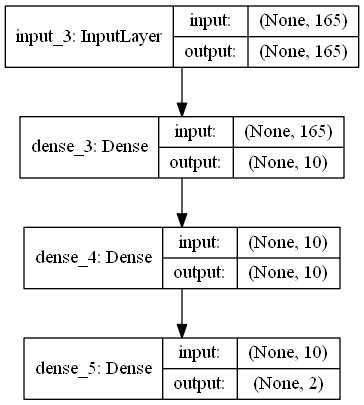

In [89]:
from keras.utils import plot_model
plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

In [90]:
history3 = model3.fit(X2_train, y2_train, batch_size=16, epochs=10, verbose=1, validation_split=0.2)

Train on 1653 samples, validate on 414 samples
Epoch 1/10
1653/1653 [==============================] - 0s 134us/step - loss: 1.0409 - acc: 0.7024 - val_loss: 0.6045 - val_acc: 0.7198
Epoch 2/10
1653/1653 [==============================] - 0s 83us/step - loss: 0.6329 - acc: 0.7423 - val_loss: 0.5838 - val_acc: 0.7150
Epoch 3/10
1653/1653 [==============================] - 0s 97us/step - loss: 0.5593 - acc: 0.7495 - val_loss: 0.5221 - val_acc: 0.7343
Epoch 4/10
1653/1653 [==============================] - 0s 92us/step - loss: 0.5143 - acc: 0.7750 - val_loss: 0.5088 - val_acc: 0.7464
Epoch 5/10
1653/1653 [==============================] - 0s 80us/step - loss: 0.4883 - acc: 0.7828 - val_loss: 0.5263 - val_acc: 0.7295
Epoch 6/10
1653/1653 [==============================] - 0s 86us/step - loss: 0.4763 - acc: 0.7816 - val_loss: 0.4859 - val_acc: 0.7609
Epoch 7/10
1653/1653 [==============================] - 0s 66us/step - loss: 0.4663 - acc: 0.7852 - val_loss: 0.4900 - val_acc: 0.7560
Epoch 8

In [91]:
score = model3.evaluate(X2_test, y2_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

517/517 [==============================] - 0s 27us/step
Test Score: 0.4535879584991263
Test Accuracy: 0.8046421408653259


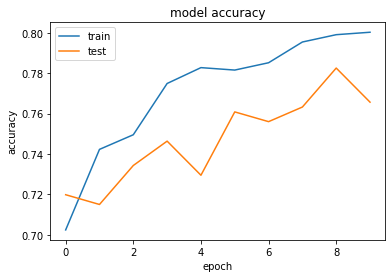

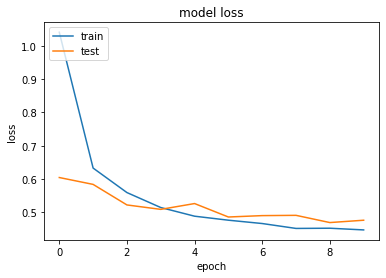

In [92]:
import matplotlib.pyplot as plt

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a model with multiple Inputs

In [93]:
X_all = data_df.drop('status', axis=1)

y_all = data_df['status']

In [94]:
input_1 = deep_inputs

In [95]:
input_2 = deep_inputs1

In [96]:
input_3 = input2

In [97]:
embedding_layer = Embedding(vocab_size, 9, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

In [98]:
embedding_layer1 = Embedding(vocab_size1, 16, weights=[embedding_matrix1], trainable=False)(deep_inputs1)
LSTM1_Layer_1 = LSTM(128)(embedding_layer1)

In [99]:
dense_layer_1 = Dense(10, activation='relu')(input2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [100]:
concat_layer = Concatenate()([LSTM_Layer_1, LSTM1_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(2, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1, input_2, input_3], outputs=output)

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 165)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 9, 9)         3470976     input_1[0][0]                    
____________________________________________________________________________________________

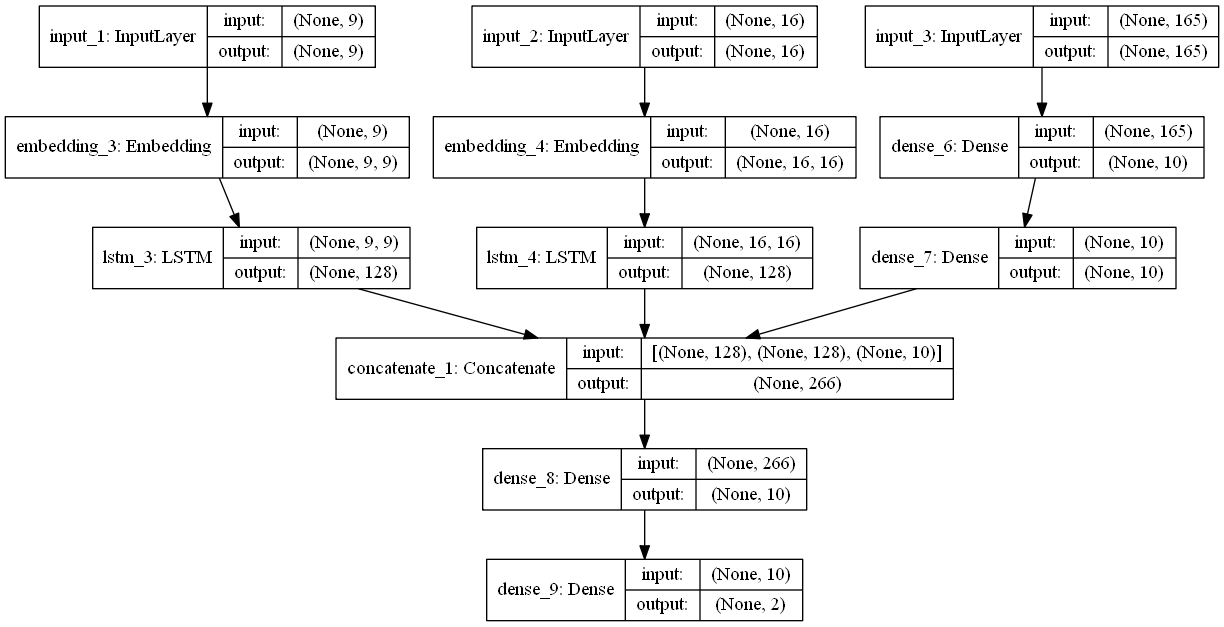

In [102]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot10.png', show_shapes=True, show_layer_names=True)

In [103]:
chat_sample = chat_df.sample(frac =.5).reset_index(drop=True)

In [104]:
X_chat = chat_sample[['chatEmbedding']].copy()
y_chat = chat_sample[['status']].copy()

In [105]:
X_chat.head()

,chatEmbedding
0,"[[0.012461126, 0.026670266, 0.0038820878, 0.04..."
1,"[[-0.043281972, -0.014264904, -0.041443884, 0...."
2,"[[-0.03131336, 0.014859889, 0.017185342, 0.007..."
3,"[[-0.00550922, -0.014139641, -0.02140875, -0.0..."
4,"[[0.021142248, 0.01665027, -0.048583306, -0.02..."


In [106]:
embedding_matrix_chat = chat_sample.chatEmbedding[0]
from itertools import repeat
for i in range(2583):
    embedding_matrix_chat = np.vstack((embedding_matrix_chat, chat_sample.chatEmbedding[i]))


In [107]:
X_chat = embedding_matrix_chat

In [108]:
len(X_chat)

41344

In [109]:
X_chat

array([[ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       ...,
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983]], dtype=float32)

In [110]:
y_chat = y_chat.loc[y_chat.index.repeat(16)].reset_index(drop=True)

In [111]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_chat = label_encoder.fit_transform(y_chat)

In [112]:
X_chat.shape

(41344, 9)

In [113]:
y_chat.shape

(192832,)

In [114]:
idx = np.random.choice(np.arange(len(X_chat)), 2584, replace=False)
x_sample = X_chat[idx]
y_sample = y_chat[idx]

In [115]:
x_sample.shape

(2584, 9)

In [116]:
y_sample.shape

(2584,)

In [117]:
X_train_chat, X_test_chat, y_train_chat, y_test_chat = train_test_split(x_sample, y_sample, test_size=0.20, random_state=42)

In [118]:
X_transaction = chat_sample[['chatEmbedding']].copy()
y_transaction = chat_sample[['status']].copy()

In [119]:
X1.shape

(607088, 16)

In [120]:
y1.shape

(607088,)

In [121]:
idx1 = np.random.choice(np.arange(len(X1)), 2584, replace=False)
x_trans = X1[idx1]
y_trans = y1[idx1]

In [122]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(x_trans, y_trans, test_size=0.20, random_state=42)

In [123]:
history4 = model.fit(x=[X_train_chat, X_train_trans, X2_train], y=y2_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 1653 samples, validate on 414 samples
Epoch 1/10
1653/1653 [==============================] - 1s 661us/step - loss: 0.6379 - acc: 0.7175 - val_loss: 0.5514 - val_acc: 0.7657
Epoch 2/10
1653/1653 [==============================] - 0s 252us/step - loss: 0.5659 - acc: 0.7429 - val_loss: 0.5554 - val_acc: 0.7609
Epoch 3/10
1653/1653 [==============================] - 0s 254us/step - loss: 0.5560 - acc: 0.7453 - val_loss: 0.5413 - val_acc: 0.7633
Epoch 4/10
1653/1653 [==============================] - 0s 251us/step - loss: 0.5516 - acc: 0.7477 - val_loss: 0.5403 - val_acc: 0.7560
Epoch 5/10
1653/1653 [==============================] - 0s 252us/step - loss: 0.5486 - acc: 0.7489 - val_loss: 0.5358 - val_acc: 0.7585
Epoch 6/10
1653/1653 [==============================] - 0s 250us/step - loss: 0.5448 - acc: 0.7459 - val_loss: 0.5343 - val_acc: 0.7536
Epoch 7/10
1653/1653 [==============================] - 0s 256us/step - loss: 0.5400 - acc: 0.7471 - val_loss: 0.5447 - val_acc: 0.7343
E

In [124]:
score = model.evaluate(x=[X_test_chat, X_test_trans, X2_test], y=y2_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

517/517 [==============================] - 0s 150us/step
Test Score: 0.511516957523975
Test Accuracy: 0.7562862634658813


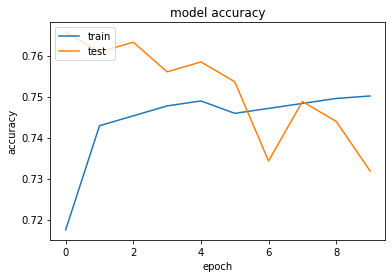

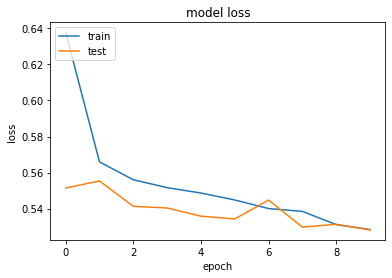

In [125]:
import matplotlib.pyplot as plt

plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()